# ensembe-learning ko agar samghna ho to KBC(Kaun Banega Crorepati) game se relate hum kr sakte hain

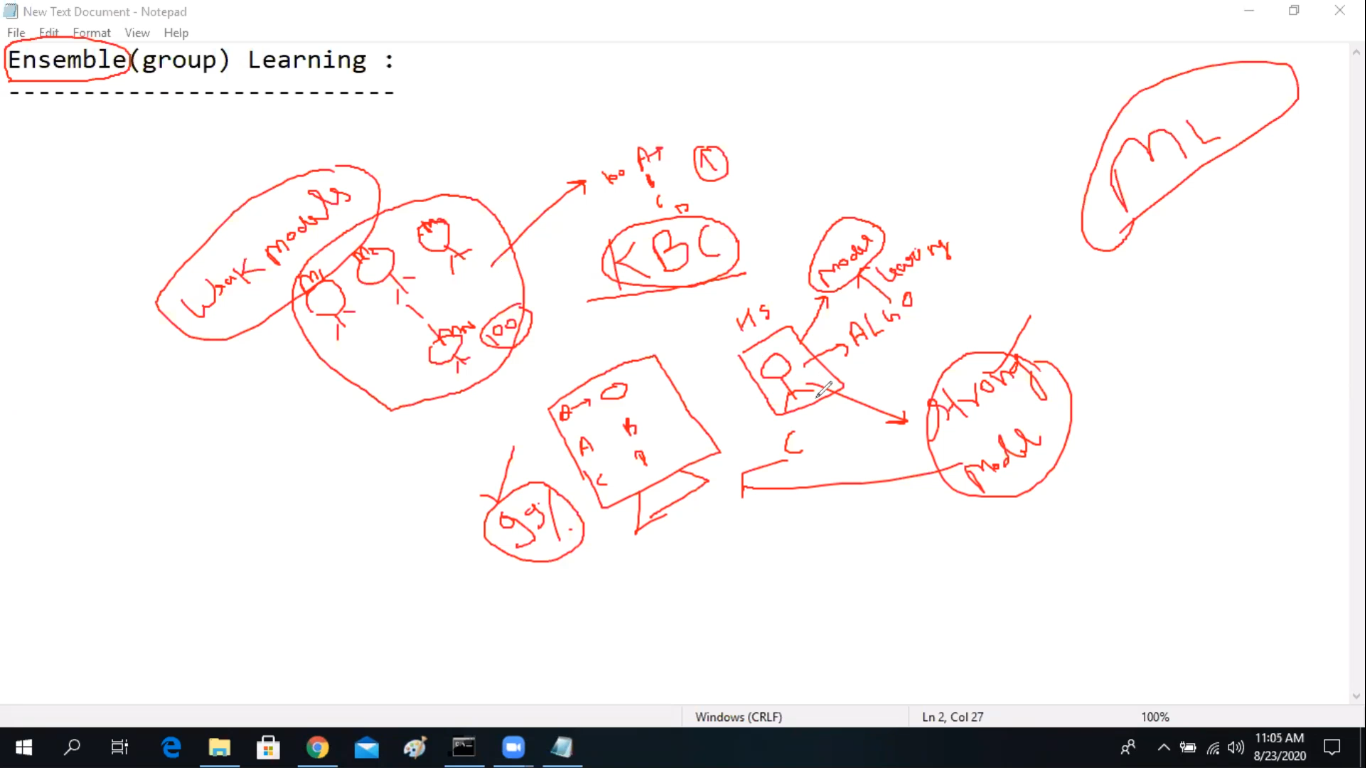

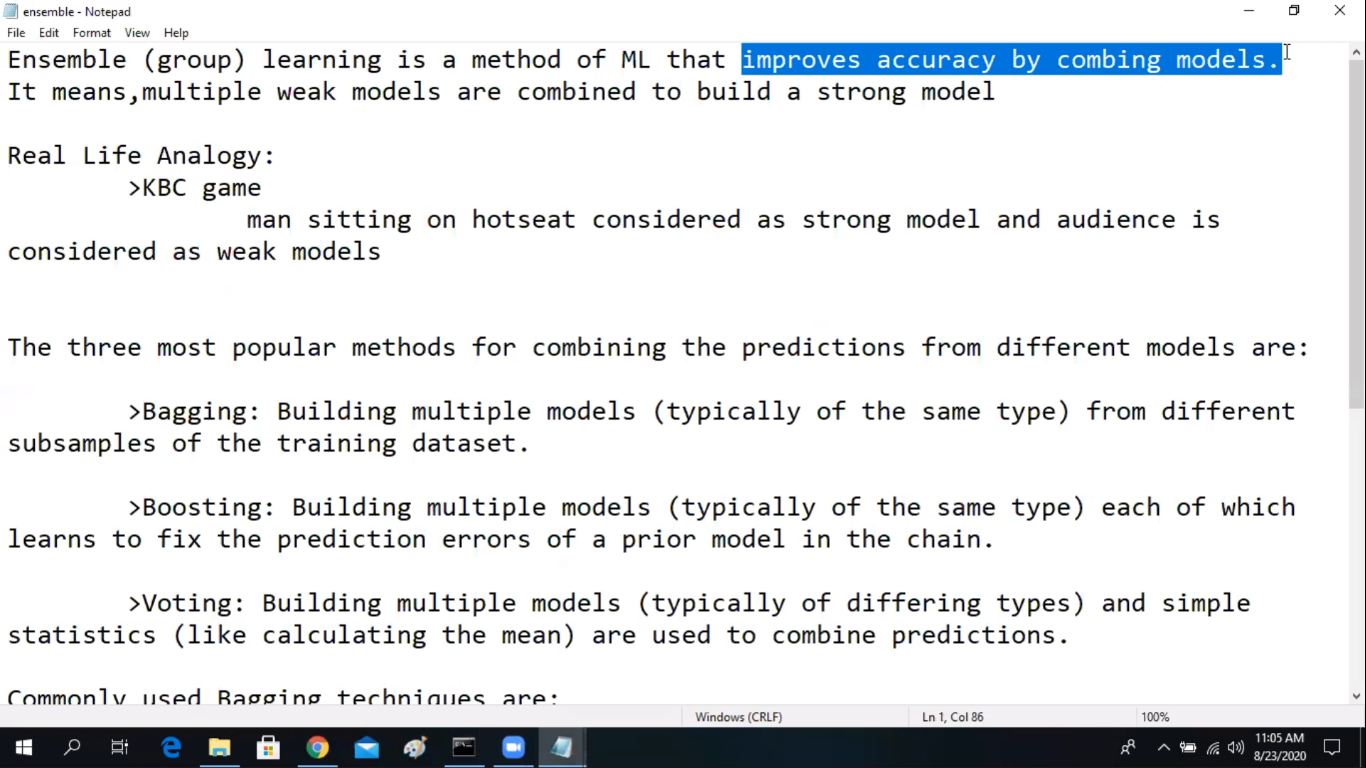

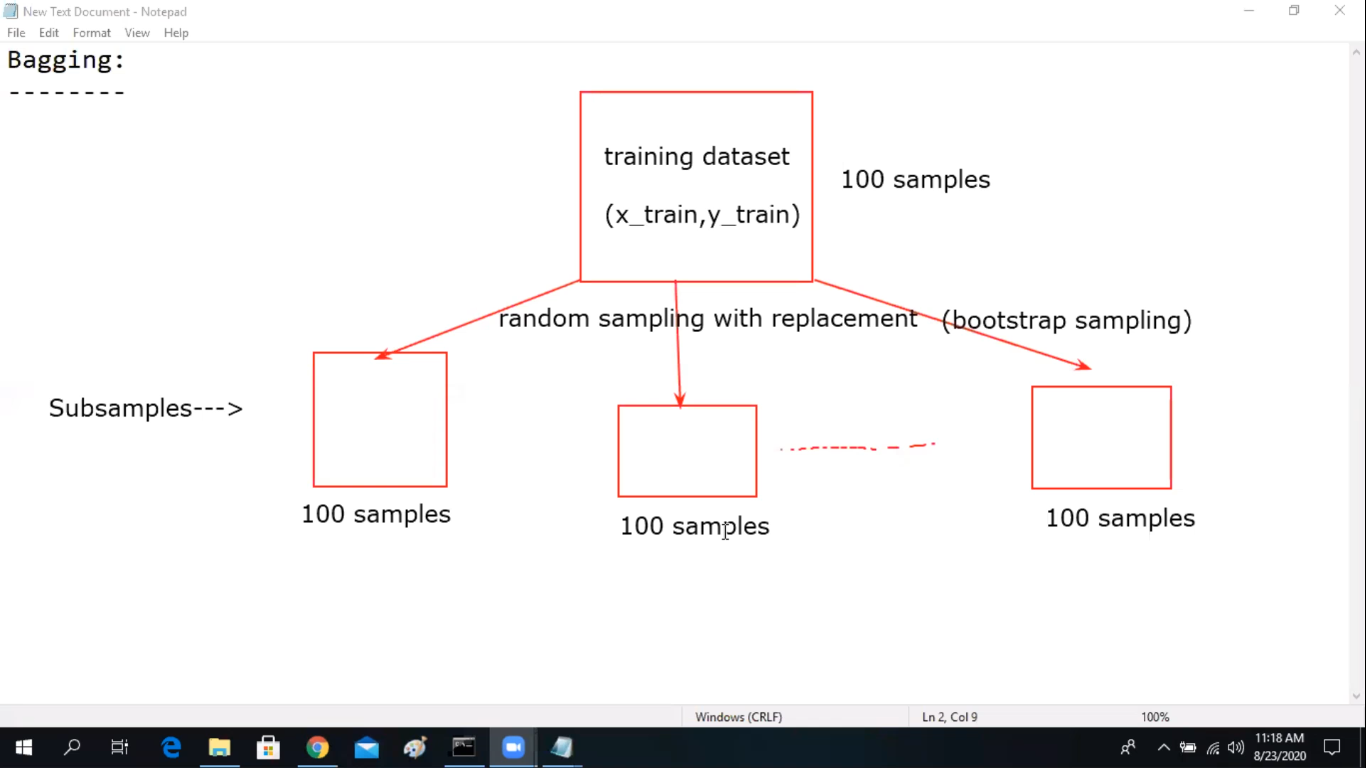

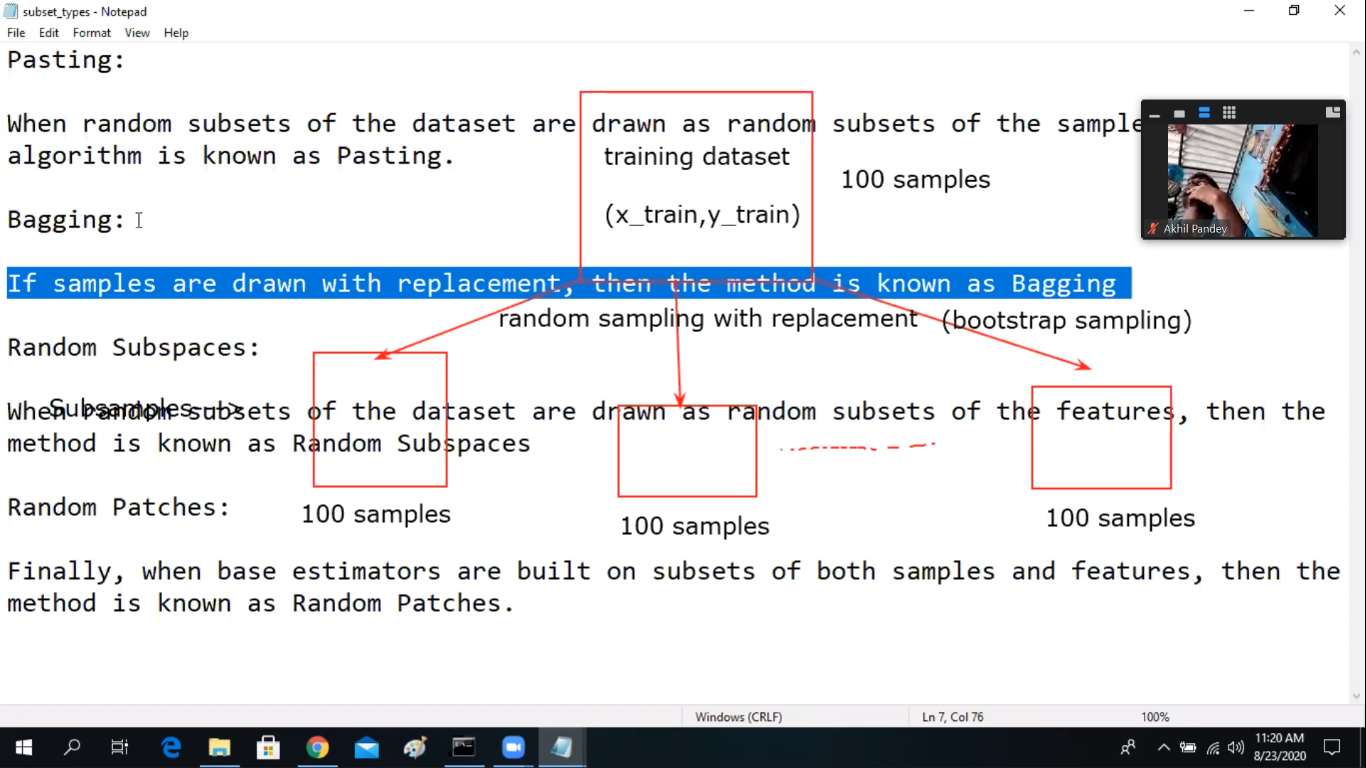

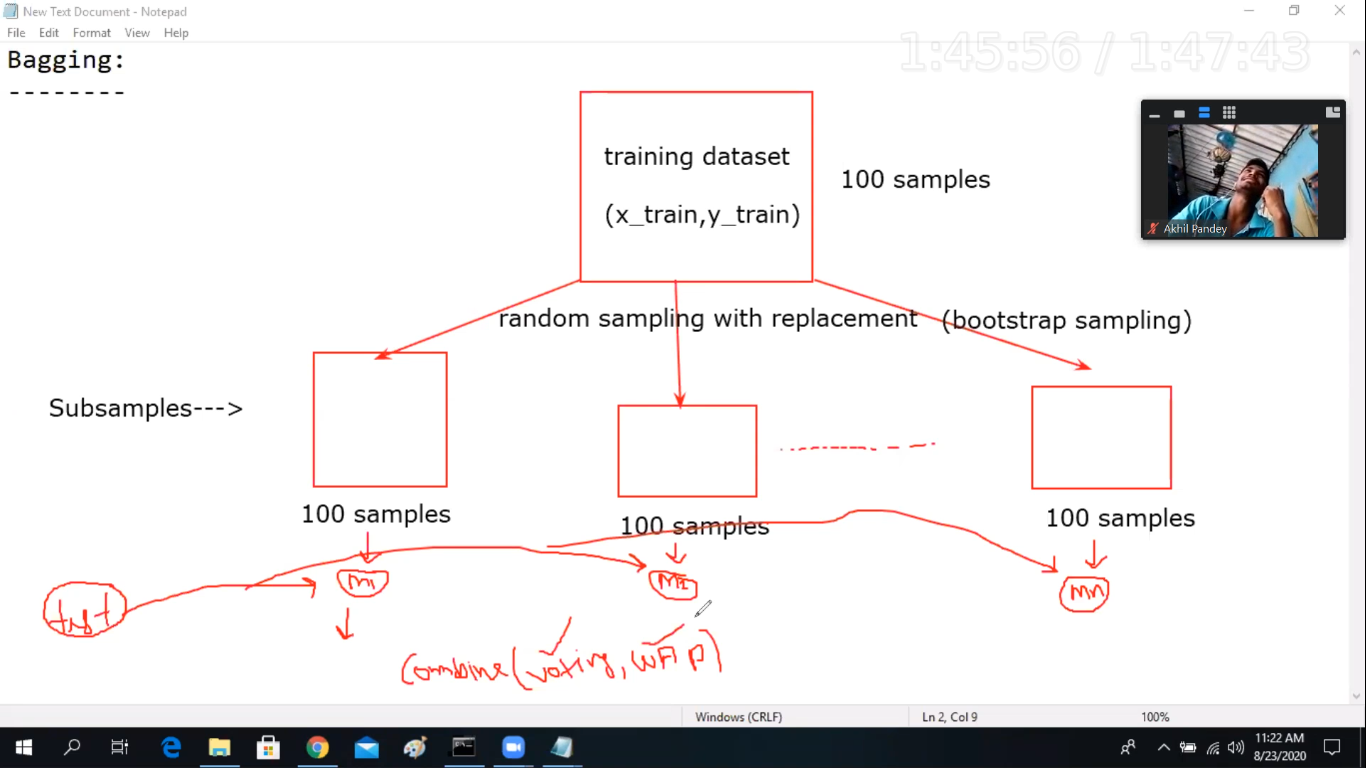

# RandomForest bagging category ki ensemble algorithm hai

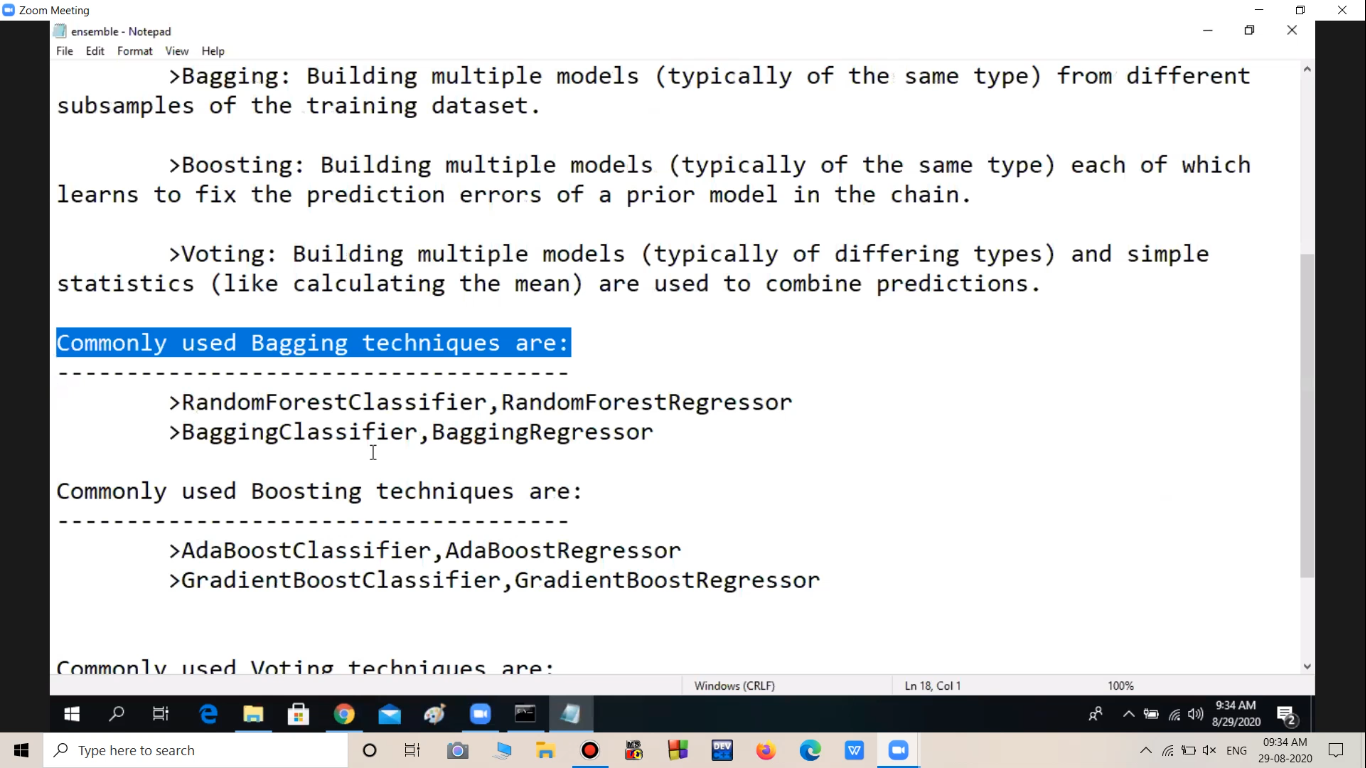

In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('/home/echelon/machine_learning_personal/machine learning/dataset/classification/iris.csv')
df

sepal_length  sepal_width  petal_length  petal_width  class
0             5.1          3.5           1.4          0.2      0
1             4.9          3.0           1.4          0.2      0
2             4.7          3.2           1.3          0.2      0
3             4.6          3.1           1.5          0.2      0
4             5.0          3.6           1.4          0.2      0
..            ...          ...           ...          ...    ...
145           6.7          3.0           5.2          2.3      2
146           6.3          2.5           5.0          1.9      2
147           6.5          3.0           5.2          2.0      2
148           6.2          3.4           5.4          2.3      2
149           5.9          3.0           5.1          1.8      2

[150 rows x 5 columns]

In [6]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=10)

In [8]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train) 
print(f'Accuracy at training data : {rfc.score(X_train,y_train)}')
print(f'Accuracy at testing data : {rfc.score(X_test,y_test)}')

Accuracy at training data : 1.0
Accuracy at testing data : 1.0


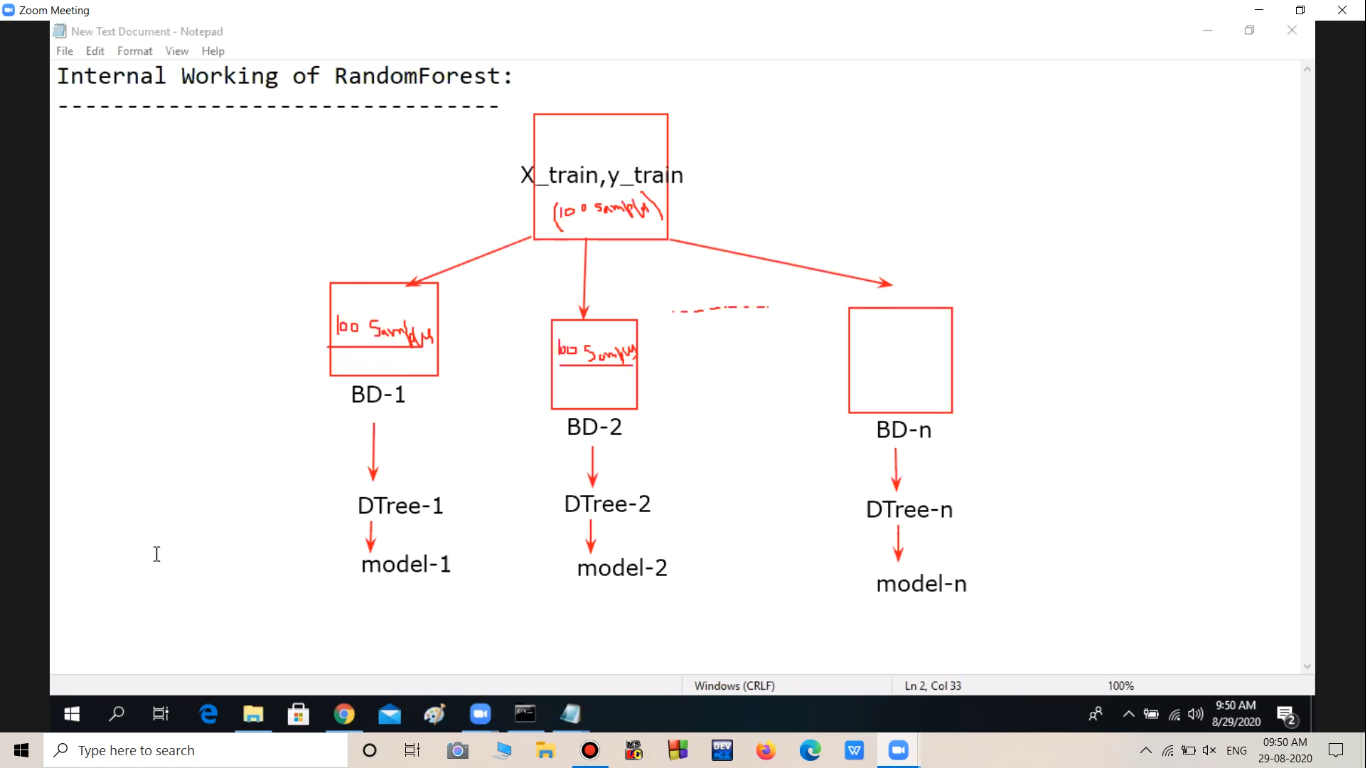

In [9]:
rfc = RandomForestClassifier(n_estimators=100)# where n_estimators means 100 DecisionTreeClassifier banenge(weak learners kehlaate hain)
rfc.fit(X_train,y_train) 
print(f'Accuracy at training data : {rfc.score(X_train,y_train)}')
print(f'Accuracy at testing data : {rfc.score(X_test,y_test)}')

Accuracy at training data : 1.0
Accuracy at testing data : 1.0


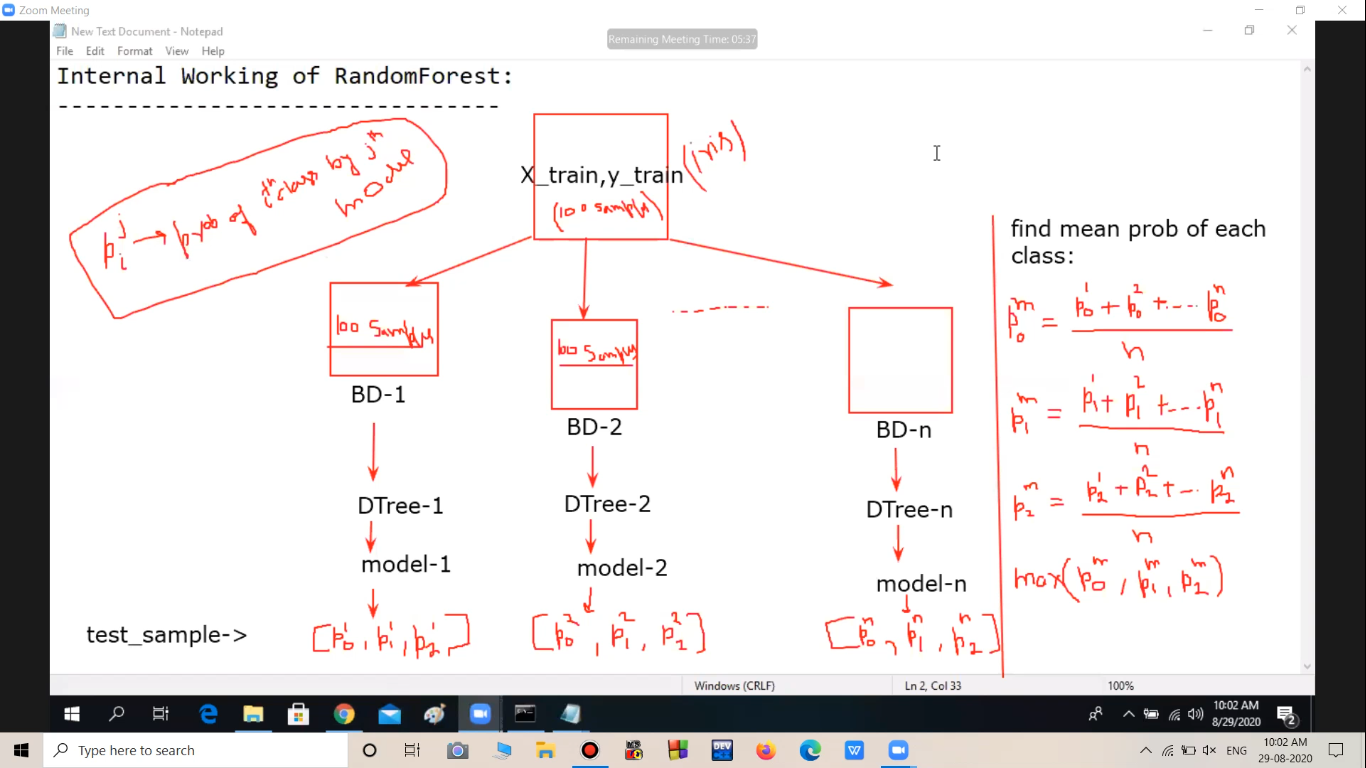

# RandomForestClassifier n_estimators ke saath-saath vo saare arguments leta hai jo DecisionTreeClassifier leta hai

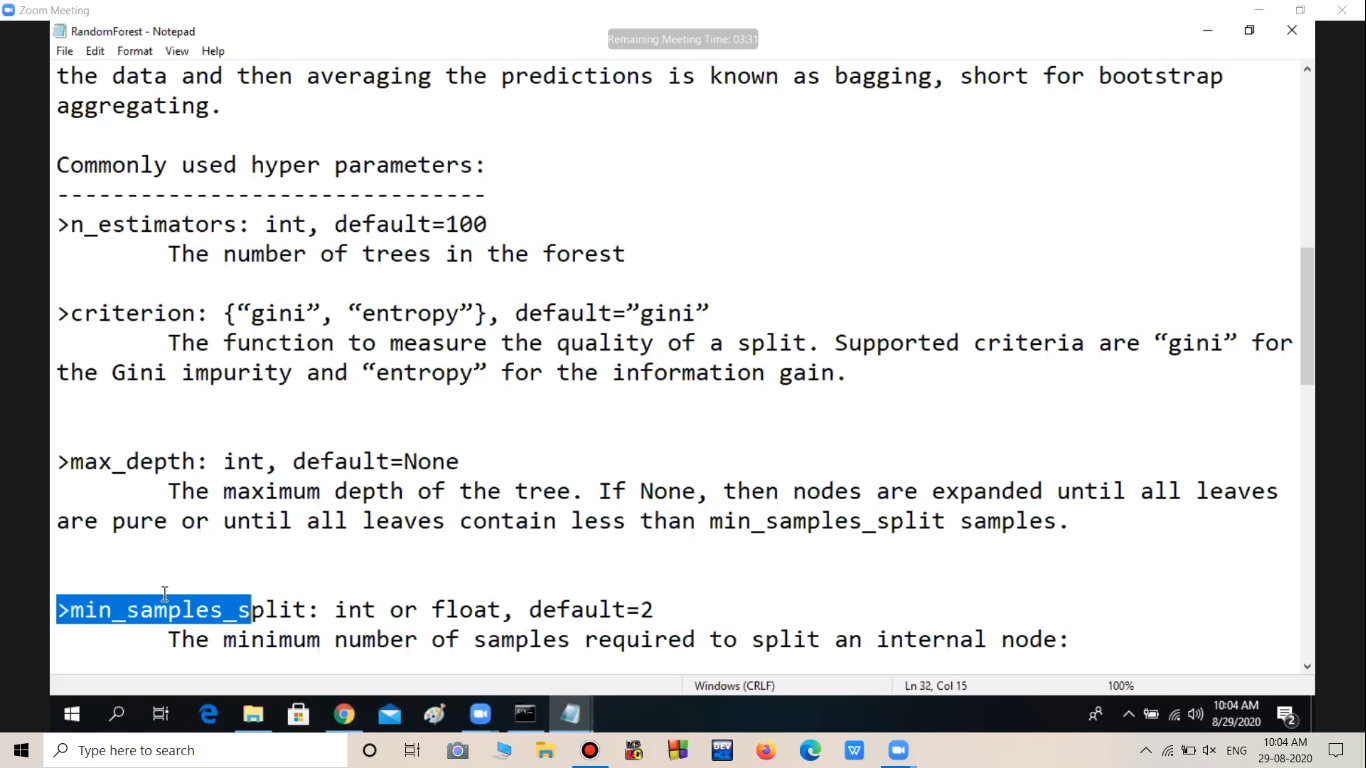

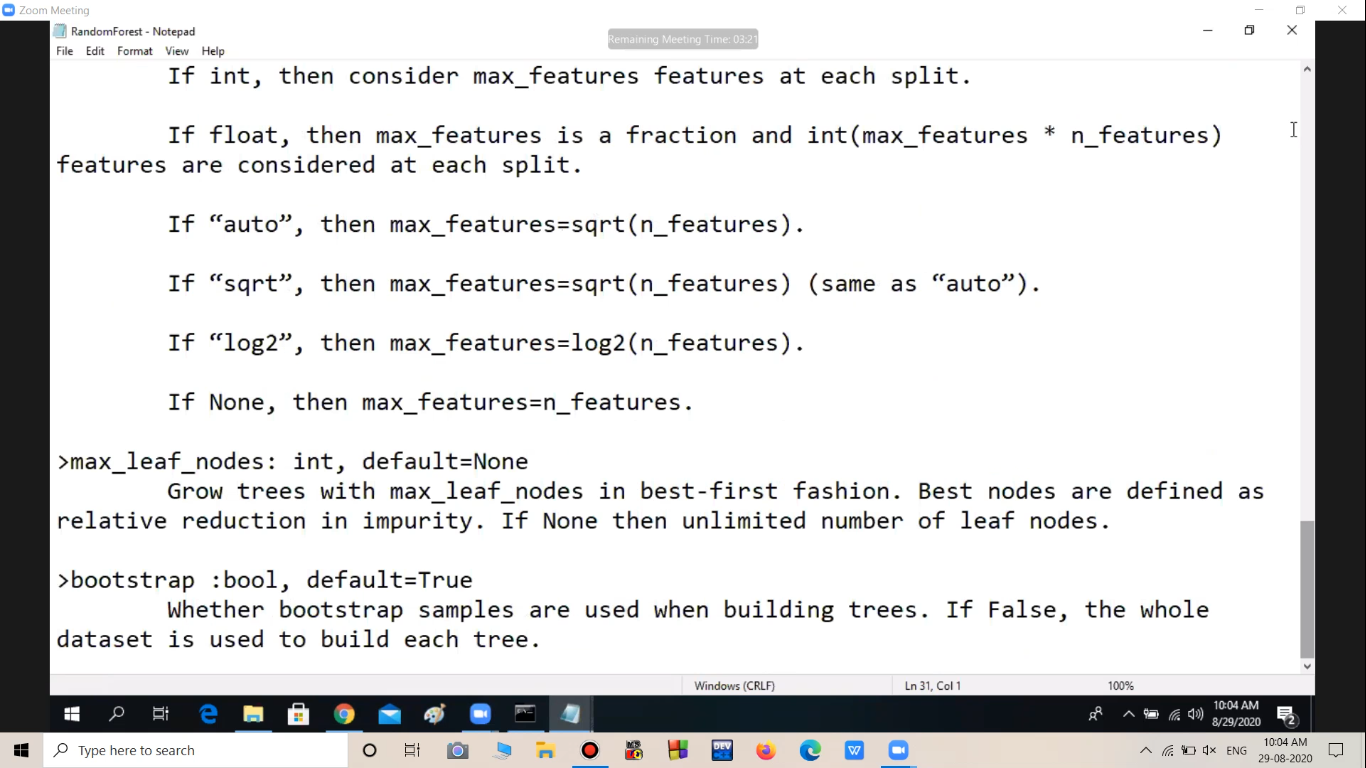

In [12]:
rfc = RandomForestClassifier(n_estimators=10,random_state=10)# where n_estimators means 100 DecisionTreeClassifier banenge(weak learners kehlaate hain)
rfc.fit(X_train,y_train) 
print(f'Accuracy at training data : {rfc.score(X_train,y_train)}')
print(f'Accuracy at testing data : {rfc.score(X_test,y_test)}')

Accuracy at training data : 1.0
Accuracy at testing data : 0.9473684210526315


# ----------------RandomForestRegressor----------------

In [2]:
import pandas as pd
df = pd.read_csv('/home/echelon/machine_learning_personal/machine learning/dataset/regression/salary_1_variable.csv')
df

YearsExperience  Salary
0               1.1   39343
1               1.3   46205
2               1.5   37731
3               2.0   43525
4               2.2   39891
5               2.9   56642
6               3.0   60150
7               3.2   54445
8               3.2   64445
9               3.7   57189
10              3.9   63218
11              4.0   55794
12              4.0   56957
13              4.1   57081
14              4.5   61111
15              4.9   67938
16              5.1   66029
17              5.3   83088
18              5.9   81363
19              6.0   93940
20              6.8   91738
21              7.1   98273
22              7.9  101302
23              8.2  113812
24              8.7  109431
25              9.0  105582
26              9.5  116969
27              9.6  112635
28             10.3  122391
29             10.5  121872

In [3]:
from sklearn.ensemble import RandomForestRegressor 

X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
rfr = RandomForestRegressor(n_estimators=10) # RandomForestRegressor apne ander se DecisionTreeRegressor use krta hai jbki hme pta hai ki DecisionTreeRegressor regression ke maamle me kharab hota hai
rfr.fit(X,y) 
print('Training Score : ',rfr.score(X,y))

Training Score :  0.9891510338320088


In [6]:
rfr.predict([[10],[15],[20]]) # sabhi pe output same de rha hai

array([117783.3, 117627.6, 117627.6])

# BaggingClassifier and BaggingRegressor

In [7]:
from sklearn.ensemble import BaggingClassifier,BaggingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 


X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values  

rfr = BaggingClassifier(base_estimator=None) #by default ye bhi DecisionTreeClassifier hi use krta hai 
rfr.fit(X,y) 
print('Training Score : ',rfr.score(X,y))

Training Score :  0.9333333333333333


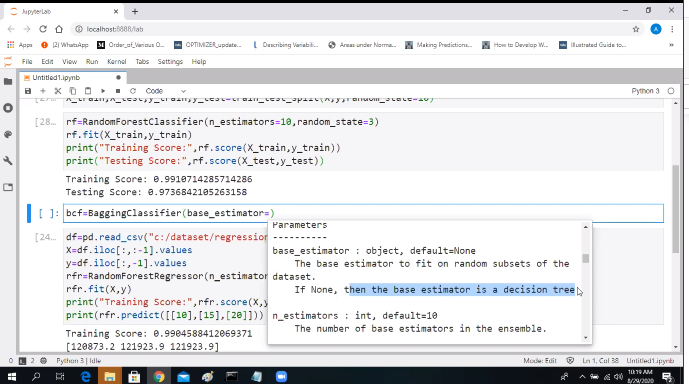

In [16]:
from sklearn.model_selection import train_test_split
df = pd.read_csv('/home/echelon/machine_learning_personal/machine learning/dataset/classification/iris.csv')
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=10)

bcf = BaggingClassifier(base_estimator=LogisticRegression(),n_estimators=10) # hum yhan pe bta bta sakte hain ki ander se kaun sa algorithm use krna hai jiase ki base_estimator = LogisticRegression 
bcf.fit(X,y) 
print('Training Score : ',bcf.score(X_train,y_train))
print('Training Score : ',bcf.score(X_test,y_test))

bcf = BaggingClassifier(base_estimator=KNeighborsClassifier(),n_estimators=10) # hum yhan pe bta bta sakte hain ki ander se kaun sa algorithm use krna hai jiase ki base_estimator = KNeighborClassifier 
bcf.fit(X,y) 
print('Training Score : ',bcf.score(X_train,y_train))
print('Training Score : ',bcf.score(X_test,y_test))

/home/echelon/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/echelon/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

Training Score :  0.9732142857142857
Training Score :  1.0
Training Score :  0.9642857142857143
Training Score :  0.9736842105263158


# BaggingRegressor

In [21]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
df = pd.read_csv('/home/echelon/machine_learning_personal/machine learning/dataset/regression/salary_1_variable.csv')

X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

bgr = BaggingRegressor(base_estimator=LinearRegression(),n_estimators=10) # hum yhan pe bta bta sakte hain ki ander se kaun sa algorithm use krna hai jiase ki base_estimator = LinearRegression 
bgr.fit(X,y) 
print('Training Score : ',bcf.score(X,y))
print(bgr.predict([[10],[15],[20]]))

bgr = BaggingRegressor(base_estimator=Ridge(),n_estimators=10) # hum yhan pe bta bta sakte hain ki ander se kaun sa algorithm use krna hai jiase ki base_estimator = LinearRegression 
bgr.fit(X,y) 
print('Training Score : ',bcf.score(X,y))
print(bgr.predict([[10],[15],[20]]))

bgr = BaggingRegressor(base_estimator=Lasso(),n_estimators=10) # hum yhan pe bta bta sakte hain ki ander se kaun sa algorithm use krna hai jiase ki base_estimator = LinearRegression 
bgr.fit(X,y) 
print('Training Score : ',bcf.score(X,y))
print(bgr.predict([[10],[15],[20]]))

Training Score :  0.9567265848727594
[120467.59774851 167971.45910226 215475.320456  ]
Training Score :  0.9567265848727594
[120809.92024164 168744.39113243 216678.86202322]
Training Score :  0.9567265848727594
[120890.7938449  169149.95851363 217409.12318236]
